In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency #chi2
import pingouin #T-test


## Ingreso de datos

In [2]:
df = pd.read_csv('Cartera_Final.csv',low_memory=False,  sep=';',
    dtype = { # indicate categorical variables
        'NRO SOLICITUD':'object',
        'COD MODALIDAD':'object',
        'NOM TIPOCLIENTE': "category",
        "SUCURSAL": "category",
        'REGION': "category",
        'UBICACIO CLIENTE': "category", 
        'PERIODICIDAD': "category",
        'CALIFICACION CIERRE': "category",
        'LINEA': "category",
        'TIPO CREDITO':"category"
    })    
to_dates=['FEC ULT.PAGO',"FEC SOLICITUD",'FEC APROBA','FEC DESEMBOLSO','FEC PROXIMO PAGO','VENCIMIENTO FINAL','Fecha']

for i in to_dates:
    df[i] = pd.to_datetime(df[i], format='%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790677 entries, 0 to 790676
Data columns (total 36 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   NRO SOLICITUD                        790677 non-null  object        
 1   OBLIGACION                           790677 non-null  int64         
 2   PAGARE                               790677 non-null  object        
 3   HOMOLOGACION DOCUMENTO DE IDENTIDAD  780832 non-null  object        
 4   NOM TIPOCLIENTE                      790677 non-null  category      
 5   SUCURSAL                             790677 non-null  category      
 6   REGION                               790677 non-null  category      
 7   MUNICIPIO CLIENTE                    790677 non-null  object        
 8   UBICACIO CLIENTE                     790676 non-null  category      
 9   MONTO                                790677 non-null  int64         
 

In [3]:
df[['NRO SOLICITUD', 'OBLIGACION', 'PAGARE',
       'HOMOLOGACION DOCUMENTO DE IDENTIDAD', 'NOM TIPOCLIENTE', 'SUCURSAL',
       'REGION', 'MUNICIPIO CLIENTE', 'UBICACIO CLIENTE', 'MONTO',
       'FEC SOLICITUD', 'FEC APROBA', 'FEC DESEMBOLSO', 'VALOR CUOTA',
       'CUOTAS PACTADAS', 'CUOTAS PENDIENTES','TASA N.A.M.V','Fecha']].sort_values('Fecha').head()

,NRO SOLICITUD,OBLIGACION,PAGARE,HOMOLOGACION DOCUMENTO DE IDENTIDAD,NOM TIPOCLIENTE,SUCURSAL,REGION,MUNICIPIO CLIENTE,UBICACIO CLIENTE,MONTO,FEC SOLICITUD,FEC APROBA,FEC DESEMBOLSO,VALOR CUOTA,CUOTAS PACTADAS,CUOTAS PENDIENTES,TASA N.A.M.V,Fecha
197836,44478,44478,52985,FA31962,Microfinanciero,YOPAL,REGION CENTRO,YOPAL,URBANA,15000000,2014-07-29,2014-07-30,2014-07-31,872738.0,10.0,10.0,33.6,2017-01-01
210378,66384,66384,75214,FA15282,Mixto,TAURAMENA,REGION SUR,TAURAMENA,URBANA,2000000,2016-11-08,2016-12-08,2016-08-16,157570.0,14.0,13.0,33.6,2017-01-01
210379,66420,66420,75288,FA23026,Microfinanciero,YOPAL,REGION CENTRO,YOPAL,RURAL,6000000,2016-11-08,2016-08-16,2016-08-17,1007282.0,8.0,8.0,26.4,2017-01-01
210380,66329,66329,75166,FA9954,Microfinanciero,VILLAVICENCIO,REGION VILLAVICENCIO,VILLAVICENCIO,URBANA,1000000,2016-11-08,2016-12-08,2016-12-08,109566.0,8.0,7.0,33.6,2017-01-01
210381,66389,66389,75219,FA17127,Microfinanciero,YOPAL,REGION CENTRO,YOPAL,URBANA,20000000,2016-12-08,2016-12-08,2016-08-16,868230.0,32.0,31.0,31.2,2017-01-01


In [4]:
df[['OBLIGACION','TASA PERIODICA', 'PERIODICIDAD', 'CALIFICACION CIERRE', 'LINEA',
       'COD MODALIDAD', 'MODALIDAD', 'SALDO OBLIGACION', 'VENCIDA',
       'DIAS VENCIDO', 'CAPITAL VEN', 'INTERES VEN', 'MORA', 'COMISION',
       'FEC ULT.PAGO', 'FEC PROXIMO PAGO', 'VENCIMIENTO FINAL',
       'PORCENTAJE PAGO', 'TIPO CREDITO', 'Fecha']].sort_values('Fecha').head()

#[df['OBLIGACION'] == "70444"]
#.sort_values('Fecha')

,OBLIGACION,TASA PERIODICA,PERIODICIDAD,CALIFICACION CIERRE,LINEA,COD MODALIDAD,MODALIDAD,SALDO OBLIGACION,VENCIDA,DIAS VENCIDO,CAPITAL VEN,INTERES VEN,MORA,COMISION,FEC ULT.PAGO,FEC PROXIMO PAGO,VENCIMIENTO FINAL,PORCENTAJE PAGO,TIPO CREDITO,Fecha
197836,44478,2.80,Mensual,E,MI CASA,404,MICROVIVIENDA,7469495,7469495,449,7469495,1193333,2697106,0,2016-12-31,2015-01-11,2016-01-08,49.80,PARALELO,2017-01-01
210378,66384,2.80,Mensual,A,CRECER,400,DESARROLLO EMPRESARIAL CRECER (PYME),1541288,0,0,0,0,0,-4150,2017-01-16,2017-02-16,2018-02-16,77.06,RENOVADO,2017-01-01
210379,66420,6.75,Trimestral,A,GERMINA,497,CREDITO RURAL INDIVIDUAL Trimestral - INTV,5406714,0,0,0,-3897,0,0,2016-12-31,2017-02-17,2018-11-17,90.11,RETANQUEADO,2017-01-01
210380,66329,2.80,Mensual,A,CRECER,400,DESARROLLO EMPRESARIAL CRECER (PYME),620929,0,0,0,-470,0,-5267,2017-01-27,2017-12-02,2017-12-08,62.09,RENOVADO,2017-01-01
210381,66389,2.60,Mensual,A,CRECER,402,FIDELIZAR,18197527,0,0,0,-34021,0,0,2017-01-30,2017-02-16,2019-08-16,90.99,PARALELO,2017-01-01


## Limpieza

Algunas tasas quedaron sin la coma de separación decimal, asi que se dividen entre 100

In [5]:
def assign_rate_year(row): 
    if row['TASA N.A.M.V'] > 100: 
        label = row['TASA N.A.M.V']/100 
    else: 
        label = row['TASA N.A.M.V']
    return label 
 
df['TASA_NOM_ANUAL'] = df.apply(lambda row:assign_rate_year(row), axis = 1)

def assign_rate_per(row): 
    if row['TASA PERIODICA'] > 100: 
        label = row['TASA PERIODICA']/100 
    else: 
        label = row['TASA PERIODICA']
    return label 
 
df['TASA_PERIODICA'] = df.apply(lambda row:assign_rate_per(row), axis = 1)


Llenar cedula fantante con respecto a la obligación

In [6]:
id_obli = df.groupby(['OBLIGACION','HOMOLOGACION DOCUMENTO DE IDENTIDAD'])['PAGARE'].count().reset_index()
id_obli.drop('PAGARE', axis = 1, inplace = True)
id_obli.drop_duplicates(inplace = True)
id_obli.rename(columns = {'HOMOLOGACION DOCUMENTO DE IDENTIDAD':'ID'},inplace = True)
id_obli.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56734 entries, 0 to 56733
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   OBLIGACION  56734 non-null  int64 
 1   ID          56734 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [7]:
df_complete = df.merge(id_obli, on = 'OBLIGACION', how = 'right') 
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790468 entries, 0 to 790467
Data columns (total 39 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   NRO SOLICITUD                        790468 non-null  object        
 1   OBLIGACION                           790468 non-null  int64         
 2   PAGARE                               790468 non-null  object        
 3   HOMOLOGACION DOCUMENTO DE IDENTIDAD  780866 non-null  object        
 4   NOM TIPOCLIENTE                      790468 non-null  category      
 5   SUCURSAL                             790468 non-null  category      
 6   REGION                               790468 non-null  category      
 7   MUNICIPIO CLIENTE                    790468 non-null  object        
 8   UBICACIO CLIENTE                     790467 non-null  category      
 9   MONTO                                790468 non-null  int64         
 

In [10]:
df_complete = df_complete.drop(df_complete[df_complete['OBLIGACION'] == 191003960].index) # Registro completo que me causa ruido
null_values = df_complete.isnull().sum().reset_index(name = 'Count')
null_values = null_values.drop(null_values[null_values["Count"]==0].index)
null_values

,index,Count
3,HOMOLOGACION DOCUMENTO DE IDENTIDAD,9598
30,FEC ULT.PAGO,36403
33,PORCENTAJE PAGO,75887


In [11]:
# Eliminar columnas que no me interesan y que cambie con limpieza
df_complete = df_complete.drop(['HOMOLOGACION DOCUMENTO DE IDENTIDAD','TASA PERIODICA',
                               'SUCURSAL','TASA N.A.M.V','MODALIDAD'], axis = 1)
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790447 entries, 0 to 790467
Data columns (total 34 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   NRO SOLICITUD        790447 non-null  object        
 1   OBLIGACION           790447 non-null  int64         
 2   PAGARE               790447 non-null  object        
 3   NOM TIPOCLIENTE      790447 non-null  category      
 4   REGION               790447 non-null  category      
 5   MUNICIPIO CLIENTE    790447 non-null  object        
 6   UBICACIO CLIENTE     790447 non-null  category      
 7   MONTO                790447 non-null  int64         
 8   FEC SOLICITUD        790447 non-null  datetime64[ns]
 9   FEC APROBA           790447 non-null  datetime64[ns]
 10  FEC DESEMBOLSO       790447 non-null  datetime64[ns]
 11  VALOR CUOTA          790447 non-null  float64       
 12  CUOTAS PACTADAS      790447 non-null  float64       
 13  CUOTAS PENDIEN

# Descripción de datos

In [12]:
df_complete.describe()

,OBLIGACION,MONTO,VALOR CUOTA,CUOTAS PACTADAS,CUOTAS PENDIENTES,SALDO OBLIGACION,VENCIDA,DIAS VENCIDO,CAPITAL VEN,INTERES VEN,MORA,COMISION,PORCENTAJE PAGO,TASA_NOM_ANUAL,TASA_PERIODICA
count,7.904470e+05,7.904470e+05,7.904470e+05,790447.000000,790447.000000,7.904470e+05,7.904470e+05,790447.000000,7.904470e+05,7.904470e+05,7.904470e+05,7.904470e+05,714560.000000,790447.000000,790447.000000
mean,3.350470e+08,4.940882e+06,4.139608e+05,17.776094,11.453543,3.152751e+06,4.313406e+05,40.301748,1.787755e+05,6.992648e+04,4.574941e+04,7.280856e+03,59.953910,33.447933,3.843448
std,5.536216e+08,5.120907e+06,4.712240e+05,9.921303,8.615342,3.785204e+06,1.628541e+06,111.855104,9.509759e+05,3.678581e+05,2.703445e+05,4.265296e+04,25.975167,3.105702,2.054978
min,2.917900e+04,3.000000e+05,1.971000e+03,1.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,-3.706103e+07,-2.439278e+06,-5.239050e+05,-9.628800e+04,0.000000,12.000000,1.000000
25%,1.710008e+08,2.000000e+06,1.690040e+05,11.000000,5.000000,1.000000e+06,0.000000e+00,0.000000,0.000000e+00,-2.408000e+03,0.000000e+00,0.000000e+00,39.950000,31.680000,2.800000
50%,1.770004e+08,3.000000e+06,2.517350e+05,18.000000,10.000000,2.000000e+06,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,63.530000,33.600000,2.940000
75%,1.960017e+08,6.000000e+06,4.607090e+05,24.000000,16.000000,3.774902e+06,0.000000e+00,8.000000,9.511500e+04,1.027100e+04,4.140000e+02,0.000000e+00,82.090000,35.280000,3.200000
max,2.112000e+09,5.500000e+07,7.977149e+07,72.000000,72.000000,5.500000e+07,4.651033e+07,1125.000000,2.625758e+07,2.010559e+07,1.500171e+07,2.043583e+06,99.980000,39.600000,13.950000


In [14]:
db = df_complete.sort_values(['OBLIGACION','Fecha'])

In [24]:
#db.to_csv('Cartera.csv')

In [23]:
db.shape
db['OBLIGACION_PREV']

(790447, 36)

In [19]:
db['PP'] = 0 #Periodo o registro en el cual paga
db['CP'] = 0 #Capital que consigue pagar



for indice, row in db.iterrows():   
    if indice > 0:
        if db.at[indice,'OBLIGACION']==db.at[(indice)-1,'OBLIGACION']:
            if db.at[indice,'SALDO OBLIGACION']<db.at[(indice)-1,'SALDO OBLIGACION']:
                if db.at[indice,'DIAS VENCIDO']>0:
                    db.at[indice,'PP'] = 1
                    db.at[indice,'CP'] = db.at[(indice)-1,'SALDO OBLIGACION'] - db.at[indice,'SALDO OBLIGACION']

KeyError: 512458

In [ ]:
db.info()

## Analisis

In [ ]:
columnas_cat = df_complete.select_dtypes(include=['category']).columns
df_complete_vencido = df_complete[(df_complete["DIAS VENCIDO"] > 0 ) & (df_complete["CAPITAL VEN"] > 0 )].copy()

for i in columnas_cat:
    table = df_complete.groupby(i)['OBLIGACION'].count().reset_index()
    #table2 = df_complete_vencido.groupby(i)['OBLIGACION'].count().reset_index()
    print(i)
    print(table)
    #print("Vencido")
    #print(table2)
    print(" ")

In [343]:
def q50(x):
    return x.quantile(0.5)



columnas_cat = df_complete_vencido.select_dtypes(include=['category']).columns

for i in columnas_cat:
    print(i)
    table = df_complete_vencido.groupby(i).agg(DIAS_VENCIDO_MEAN = ('DIAS VENCIDO', 'mean'), 
                                       DIAS_VENCIDO_Q50 = ('DIAS VENCIDO',q50), 
                                       CAPITAL_VEN_MEAN = ('CAPITAL VEN', 'mean'),
                                      CAPITAL_VEN_Q50 = ('CAPITAL VEN', q50)).round(2).reset_index()
    print(table)
    print (" ")

    


NOM TIPOCLIENTE
       NOM TIPOCLIENTE  DIAS_VENCIDO_MEAN  DIAS_VENCIDO_Q50  CAPITAL_VEN_MEAN  \
0  Codeudor no cliente              96.86              29.0         535602.12   
1            Fondeador              10.08               9.0          88179.92   
2       Gestion social             133.07              67.0         402171.88   
3      Microfinanciero             150.24              70.0         851394.54   
4                Mixto             130.78              59.0         815267.32   
5            Proveedor                NaN               NaN               NaN   

   CAPITAL_VEN_Q50  
0         228211.0  
1          84234.0  
2         321769.0  
3         412390.5  
4         470422.0  
5              NaN  
 
REGION
                   REGION  DIAS_VENCIDO_MEAN  DIAS_VENCIDO_Q50  \
0                  ARIARI             144.59              89.0   
1           CENTRO BOYACA             105.86              55.0   
2            CENTRO NORTE             146.21              67.0

In [312]:
df_grupped = df_complete.groupby('OBLIGACION').agg(INTERES_VEN = ('INTERES VEN', 'mean'),
                                 DIAS_VENCIDO = ('DIAS VENCIDO', 'mean'),
                                 CAPITAL_VEN = ('CAPITAL VEN', 'mean')).reset_index()


df_unico = df_complete[['NRO SOLICITUD', 'OBLIGACION', 'PAGARE', 'ID', 'NOM TIPOCLIENTE', 'REGION', 'MUNICIPIO CLIENTE', 
                        'UBICACIO CLIENTE', 'MONTO','FEC SOLICITUD', 'FEC APROBA', 'FEC DESEMBOLSO',
        'VALOR CUOTA', 'CUOTAS PACTADAS','TASA_NOM_ANUAL','TASA_PERIODICA', 'PERIODICIDAD', 'CALIFICACION CIERRE', 'LINEA',
       'COD MODALIDAD', 'TIPO CREDITO']].drop_duplicates()

df_grupped_mean = df_grupped.merge(df_unico, on  = 'OBLIGACION')
df_grupped_mean.shape[0] # Se obtiene casi 3 registros por cada obligación.

157599

In [315]:
df_grupped_mean.describe()

,OBLIGACION,INTERES_VEN,DIAS_VENCIDO,CAPITAL_VEN,MONTO,VALOR CUOTA,CUOTAS PACTADAS,TASA_NOM_ANUAL,TASA_PERIODICA
count,1.575990e+05,1.575990e+05,157599.000000,1.575990e+05,1.575990e+05,1.575990e+05,157599.000000,157599.000000,157599.000000
mean,2.368521e+08,6.784908e+04,42.280581,1.698213e+05,4.428627e+06,3.781279e+05,16.570359,33.519669,3.709764
std,4.970956e+08,2.723764e+05,81.490106,6.175901e+05,4.701207e+06,4.601848e+05,9.603126,3.210409,1.940586
min,0.000000e+00,-8.275677e+05,0.000000,-2.163077e+05,3.000000e+05,1.971000e+03,1.000000,12.000000,1.000000
25%,0.000000e+00,-2.083219e+04,0.000000,-2.163077e+05,2.000000e+06,1.576710e+05,10.000000,31.680000,2.800000
50%,1.710018e+08,-3.237500e+02,0.003341,0.000000e+00,3.000000e+06,2.334790e+05,15.000000,33.600000,2.940000
75%,1.920024e+08,3.975285e+04,39.055640,2.142772e+05,5.000000e+06,4.110400e+05,24.000000,35.280000,3.200000
max,2.112000e+09,1.079925e+07,821.000000,1.644058e+07,5.500000e+07,7.977149e+07,72.000000,39.600000,13.950000


<AxesSubplot:title={'center':'Histograms of Due Days'}, ylabel='Frequency'>

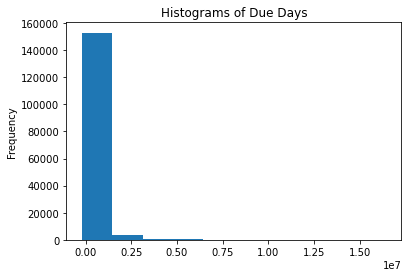

In [318]:
df_grupped_mean['CAPITAL_VEN'].plot.hist(title = "Histograms of Due Days")